In [35]:
import pandas as pd
import hvplot.pandas
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


In [36]:
df = Path("Student performance (Polytechnic Institute of Portalegre).csv")
df = pd.read_csv(df)
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [37]:
model = KMeans(n_clusters=3)


In [38]:
# Define the mapping
mapping = {'Dropout': 0, 'Enrolled': 1, 'Graduate': 2}
# Apply the mapping to the 'Target' column
df['Target'] = df['Target'].map(mapping)
# Convert the 'Target' column to an array
target_array = df['Target'].values
print(target_array)

[0 2 0 ... 0 2 2]


In [39]:
model.fit(df)

/Users/kaylajehnzen/anaconda3/envs/dev/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [40]:
# Predict the model segments (clusters)
clusters = model.predict(df)
# View the stock segments
print(clusters)

# Create a new column in the DataFrame with the predicted clusters
df["Cluster"] = clusters
# Review the DataFrame
df.head()

[1 2 2 ... 0 2 0]


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Cluster
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,0,1
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,2,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,0,2
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,2,0
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,2,2


In [41]:
# Create a scatter plot 
df.hvplot.scatter(
    y="Target",
    x="Previous qualification (grade)",
    by="Cluster",
    title = "Scatter Plot by Grade")

:NdOverlay   [Cluster]
   :Scatter   [Previous qualification (grade)]   (Target)

In [42]:
PCA=PCA(n_components = 3)

In [43]:
PCA_data = PCA.fit_transform(df)

In [44]:
PCA_data[:5]

array([[ 8.68566081e+03, -8.54941963e-01, -1.44636041e+00],
       [-3.97309274e+02, -1.37686476e+01,  2.89722952e+01],
       [-2.13334747e+02, -2.05475256e+00, -8.57994757e+00],
       [-9.16379521e+02, -9.01793349e+00, -1.80644156e+01],
       [ 8.42606536e+02, -1.28120881e-01, -3.63764101e+01]])

In [45]:
PCA.explained_variance_ratio_

array([9.99334288e-01, 3.00321082e-04, 9.48201808e-05])

In [46]:
status_counts = df.groupby(['Course', 'Target']).size().unstack(fill_value=0)
# Display the result
print(status_counts)

Target    0    1    2
Course               
33        8    3    1
171      82   37   96
8014     71   21  123
9003     86   37   87
9070     51   42  133
9085     90   75  172
9119     92   64   14
9130     78   21   42
9147    134  108  138
9238     65   42  248
9254     96   41  115
9500    118  100  548
9556     33   17   36
9670     95   48  125
9773    101   34  196
9853     85   50   57
9991    136   54   78


In [47]:
p_q_counts = df.groupby(["Previous qualification", 'Target']).size().unstack(fill_value=0)
# Display the result
print(p_q_counts)

Target                     0    1     2
Previous qualification                 
1                       1078  698  1941
2                         16    1     6
3                         75    4    47
4                          4    1     3
5                          1    0     0
6                          7    1     8
9                         11    0     0
10                         3    0     1
12                        26    6    13
14                         1    0     0
15                         1    0     1
19                       104   13    45
38                         3    1     3
39                        69   55    95
40                        14    6    20
42                         6    8    22
43                         2    0     4


In [48]:
p_g_counts = df.groupby(["Previous qualification (grade)", 'Target']).size().unstack(fill_value=0)
# Display the result
print(p_g_counts)

Target                           0   1   2
Previous qualification (grade)            
95.0                             1   0   0
96.0                             1   1   0
97.0                             0   0   1
99.0                             0   1   1
100.0                           29  14  33
...                             ..  ..  ..
180.0                            4   2   3
182.0                            0   0   1
184.4                            0   0   1
188.0                            1   0   0
190.0                            1   1   0

[101 rows x 3 columns]


In [49]:
N_counts = df.groupby(["Nacionality", 'Target']).size().unstack(fill_value=0)
# Display the result
print(N_counts)

Target          0    1     2
Nacionality                 
1            1389  770  2155
2               0    0     2
6               4    5     4
11              0    0     3
13              0    0     1
14              0    0     1
17              1    0     0
21              1    1     0
22              4    1     8
24              1    0     4
25              0    1     1
26              1    5     8
32              0    1     0
41             14    6    18
62              0    1     1
100             2    1     0
101             1    0     1
103             1    0     2
105             1    1     0
108             0    1     0
109             1    0     0


In [50]:
m_q_counts = df.groupby(["Mother's qualification", 'Target']).size().unstack(fill_value=0)
# Display the result
print(m_q_counts)

Target                    0    1    2
Mother's qualification               
1                       300  204  565
2                        20   23   40
3                       139  101  198
4                         8   15   26
5                         8    5    8
6                         3    0    1
9                         5    0    3
10                        2    0    1
11                        2    0    1
12                       22    3   17
14                        1    0    1
18                        1    0    0
19                      271  176  506
22                        0    0    1
26                        0    0    1
27                        1    0    0
29                        1    0    2
30                        1    0    2
34                       96    3   31
35                        2    0    1
36                        2    0    1
37                      383  169  457
38                      140   91  331
39                        4    2    2
40          

In [51]:
f_q_counts = df.groupby(["Father's qualification", 'Target']).size().unstack(fill_value=0)
# Display the result
print(f_q_counts)

Target                    0    1    2
Father's qualification               
1                       281  172  451
2                        22   25   21
3                        90   62  130
4                        14    7   18
5                        10    3    5
6                         2    0    0
9                         1    0    4
10                        2    0    0
11                        4    0    6
12                       14    4   20
13                        1    0    0
14                        1    0    3
18                        1    0    0
19                      264  183  521
20                        1    0    0
22                        4    0    0
25                        1    0    0
26                        1    0    1
27                        1    0    0
29                        3    0    0
30                        1    1    2
31                        1    0    0
33                        1    0    0
34                       81    3   28
35          

In [52]:
a_o_counts = df.groupby(["Application order", 'Target']).size().unstack(fill_value=0)
# Display the result
print(a_o_counts)

Target                0    1     2
Application order                 
0                     0    0     1
1                  1053  565  1408
2                   150   96   301
3                    76   60   173
4                    58   31   160
5                    53   25    76
6                    31   16    90
9                     0    1     0


In [53]:
a_g_counts = df.groupby(["Admission grade", 'Target']).size().unstack(fill_value=0)
# Display the result
print(a_g_counts)

Target           0  1  2
Admission grade         
95.0             7  1  3
95.1             1  0  0
95.5             1  0  1
95.8             1  0  0
96.0             5  2  0
...             .. .. ..
180.4            1  0  0
183.5            1  0  0
184.0            0  0  1
184.4            0  0  1
190.0            1  1  1

[620 rows x 3 columns]


In [54]:
s_n_counts = df.groupby(["Educational special needs", 'Target']).size().unstack(fill_value=0)
# Display the result
print(s_n_counts)

Target                        0    1     2
Educational special needs                 
0                          1404  783  2186
1                            17   11    23


In [55]:
g_counts = df.groupby(["Gender", 'Target']).size().unstack(fill_value=0)
# Display the result
print(g_counts)

Target    0    1     2
Gender                
0       720  487  1661
1       701  307   548


In [56]:
T_counts = df.groupby(["Tuition fees up to date", 'Target']).size().unstack(fill_value=0)
# Display the result
print(T_counts)

Target                     0    1     2
Tuition fees up to date                
0                        457   42    29
1                        964  752  2180


In [57]:
S_counts = df.groupby(["Scholarship holder", 'Target']).size().unstack(fill_value=0)
# Display the result
print(S_counts)

Target                 0    1     2
Scholarship holder                 
0                   1287  664  1374
1                    134  130   835


In [58]:
A_counts = df.groupby(["Age at enrollment", 'Target']).size().unstack(fill_value=0)
# Display the result
print(A_counts)

Target               0    1    2
Age at enrollment               
17                   0    2    3
18                 202  172  662
19                 207  157  547
20                 133  140  326
21                  93   70  159
22                  58   37   79
23                  41   24   43
24                  56   30   45
25                  47   21   25
26                  52   19   23
27                  55   12   24
28                  47   15   21
29                  45    5   16
30                  30    6   13
31                  36    7   12
32                  33    5   23
33                  20    8   17
34                  29   12   19
35                  29    5   15
36                  21    3   11
37                  23    5   14
38                  19    4    6
39                  18    5   15
40                  13    4    6
41                  11    5   15
42                   7    2    4
43                  11    3   11
44                  10    2    9
45        

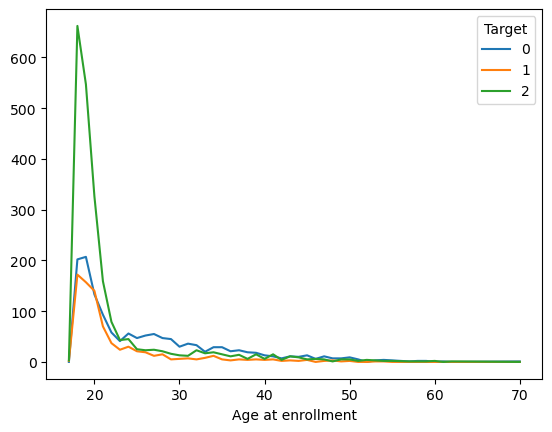

In [62]:
A_counts.plot()
plt.savefig('Figures/Age_at_enrollment.PNG')
plt.show()

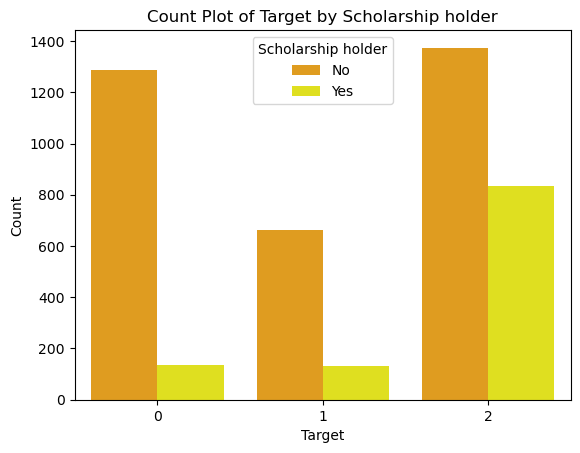

In [63]:
df_plot = df.replace({'Scholarship holder': {1: 'Yes', 0: 'No'}})
colors = ['orange', 'yellow']
sns.countplot(x='Target', data=df_plot, hue='Scholarship holder', palette=colors)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Count Plot of Target by Scholarship holder');
plt.savefig('Figures/scholarship_holder.PNG')

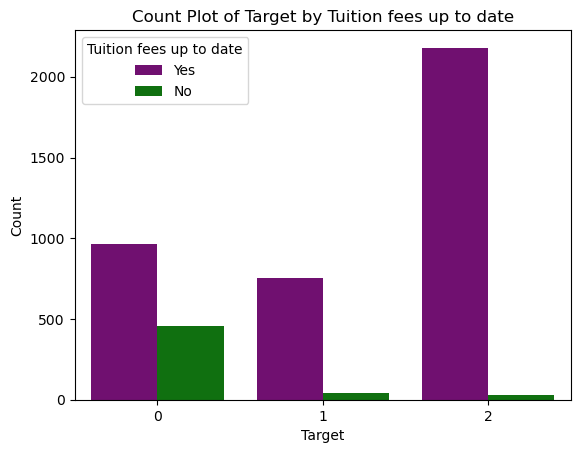

In [29]:
#T_counts.plot()
#plt.show()


df_plot = df.replace({'Tuition fees up to date': {1: 'Yes', 0: 'No'}})
colors = ['purple', 'green']
sns.countplot(x='Target', data=df_plot, hue='Tuition fees up to date', palette=colors)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Count Plot of Target by Tuition fees up to date');

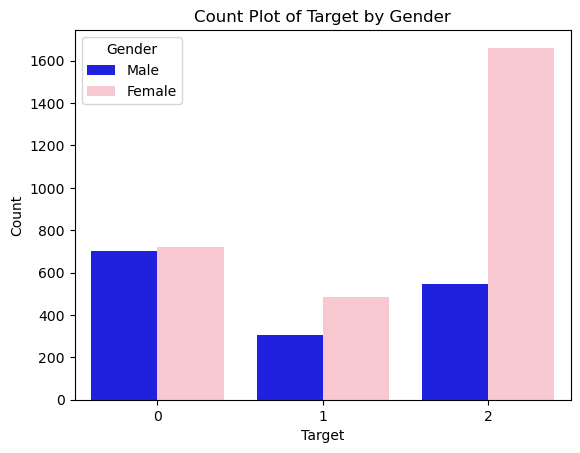

In [30]:
#g_counts.plot()
#plt.show()

df_plot = df.replace({'Gender': {1: 'Male', 0: 'Female'}})
colors = ['blue', 'pink']
sns.countplot(x='Target', data=df_plot, hue='Gender', palette=colors)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Count Plot of Target by Gender');

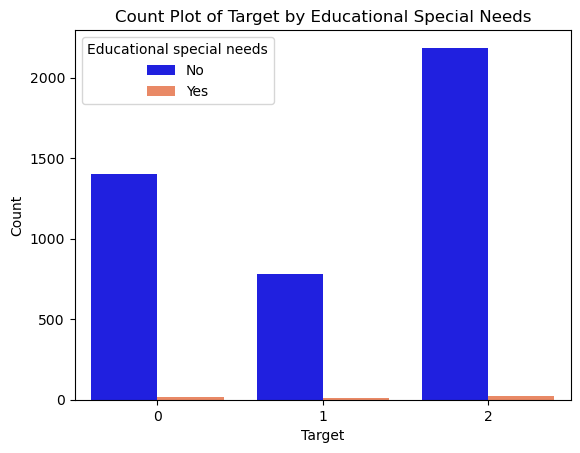

In [31]:
df_plot = df.replace({'Educational special needs': {1: 'Yes', 0: 'No'}})
colors = ['blue', 'coral']
sns.countplot(x='Target', data=df_plot, hue='Educational special needs', palette=colors)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Count Plot of Target by Educational Special Needs');

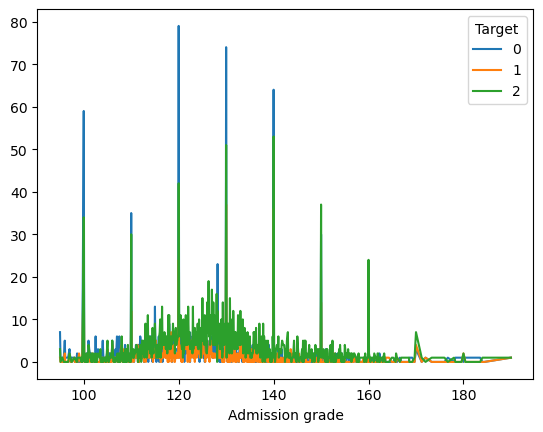

In [32]:
a_g_counts.plot()
plt.show()

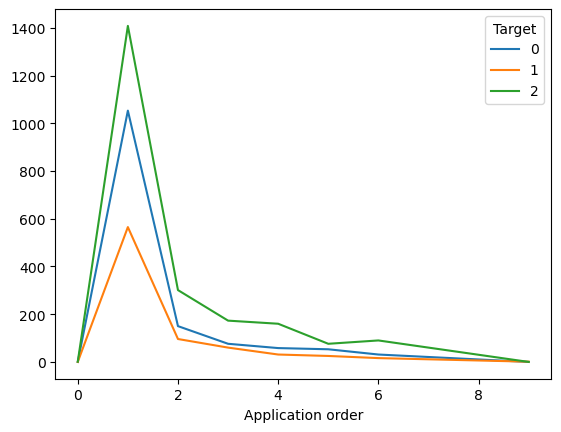

In [33]:
a_o_counts.plot()
plt.show()

In [34]:
# f_q_counts.plot()
# plt.show()

# df_plot = df.replace({'Fathers qualification': {1: 'Yes', 0: 'No'}})
# colors = ['blue', 'coral']
# sns.countplot(x='Target', data=df_plot, hue='Educational special needs', palette=colors)
# plt.xlabel('Target')
# plt.ylabel('Count')
# plt.title('Count Plot of Target by Educational Special Needs');